<a href="https://colab.research.google.com/github/TheSeems/HseNotebooks/blob/main/Akhundov_calculus_7_2020_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Занятие 7
## Математический анализ
## Исследование функции с sympy.calculus.util и sympy.calculus.singularities

In [1]:
!python -m pip install sympy --upgrade
!python -m pip install -U matplotlib

Requirement already up-to-date: sympy in /usr/local/lib/python3.6/dist-packages (1.7.1)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.4)


In [2]:
import sympy
from sympy import S, Interval, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.calculus.util import continuous_domain, function_range, periodicity, stationary_points, maximum, minimum, AccumBounds
from sympy.calculus.singularities import singularities, is_increasing, is_decreasing, is_monotonic
from sympy.calculus.singularities import is_strictly_increasing, is_strictly_decreasing
%matplotlib inline

## Схема анализа функции.
1. Область определения

sympy.calculus.util.continuous_domain(f, symbol, domain)

f - выражение, описывающее функцию, 

symbol - переменная, от которой зависит исследуемая функция,

domain - область значений переменной, на которой рассматривается функция,

если функция рассматривается на всей вещественной прямой, то domain=S.Reals

Сингулярные точки (точки, в которых функция не существует) находятся с помощью

sympy.calculus.singularities.singularities(f, symbol, domain=None)

2. Область значений

sympy.calculus.util.function_range(f, symbol, domain)

3. Периодичность

sympy.calculus.util.periodicity(f, symbol, check=False)

4. Стационарные точки 

sympy.calculus.util.stationary_points(f, symbol, domain=Reals)

5. Точки экстремума

sympy.calculus.util.maximum(f, symbol, domain=Reals)

sympy.calculus.util.minimum(f, symbol, domain=Reals)

6. Монотонность

sympy.calculus.singularities.is_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_increasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_monotonic(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_increasing(f, interval=Reals, symbol=None)

7. Минимальное и максимальное значение функции на интервале 

sympy.calculus.util.AccumulationBounds(min, max)

Свойства: delta, max, min, mid

### Задание 1.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7 на одном периоде, построить график.
$$
f(x) = e^{\sin(x)}.
$$
###### 1. Область определения

In [3]:
x = sympy.Symbol('x')
f = Exp(Sin(x))
domain = continuous_domain(f, x, S.Reals)
domain

Reals

Сингулярные точки (точки, где функция не определена)

In [4]:
singular = singularities(f, x)
singular

EmptySet

###### 2. Область значений

In [5]:
range = function_range(f, x, S.Reals)
range

Interval(exp(-1), E)

###### 3. Периодичность

In [6]:
period = periodicity(f, x)
period_range = sympy.Interval(0, period)
period

2*pi

###### 4. Стационарные точки

In [7]:
station = stationary_points(f, x)
station

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

###### 5. Максимальное и минимальное значения функции

In [8]:
display(maximum(f, x), minimum(f, x))

E

exp(-1)

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [9]:
continuous_domain(f, x, period_range)

Interval(0, 2*pi)

Сингулярные точки (точки, где функция не определена)

In [10]:
singularities(f, x, period_range)

EmptySet

###### 2. Область значений

In [11]:
function_range(f, x, period_range)

Interval(exp(-1), E)

###### 4. Стационарные точки 

In [12]:
stationary_points(f, x, period_range)

FiniteSet(pi/2, 3*pi/2)

###### 5. Максимальное и минимальное значения функции

In [34]:
display(maximum(f, x, period_range), minimum(f, x, period_range))

E

exp(-1)

###### 6. Монотонность
Исследовать на периоде открытые интервалы (Interval.open), на которые период разбивают стационарные точки.

In [16]:
intervals = [
  Interval.open(0, Pi / 2),
  Interval.open(Pi / 2, Pi),
  Interval.open(Pi, 3 * Pi / 2),
  Interval.open(3 * Pi / 2, 2 * Pi)
]

for interval in intervals:
  display(interval)
  print(is_monotonic(f, interval=interval), is_decreasing(f, interval=interval), is_increasing(f, interval=interval), is_strictly_decreasing(f, interval=interval), is_strictly_increasing(f, interval=interval))

Interval.open(0, pi/2)

True None None None None


Interval.open(pi/2, pi)

True None None None None


Interval.open(pi, 3*pi/2)

True None None None None


Interval.open(3*pi/2, 2*pi)

True None None None None


###### 7. Минимальное и максимальное значение функции на интервале 
Найти максимальное и минимальное значение функции на каждом из интервалов монотонности в пределах одного периода

In [21]:
previous = 0
for k in [0, 1, 2, 3]:
  left_border = previous
  right_border = previous + sympy.pi / 2
  display(Interval.open(left_border, right_border))

  if is_monotonic(f, interval=Interval.open(left_border, right_border)):
    display(maximum(f, x, domain=Interval.open(left_border, right_border)))
    display(minimum(f, x, domain=Interval.open(left_border, right_border)))
  
  previous += sympy.pi / 2

Interval.open(0, pi/2)

E

1

Interval.open(pi/2, pi)

E

1

Interval.open(pi, 3*pi/2)

1

exp(-1)

Interval.open(3*pi/2, 2*pi)

1

exp(-1)

###### График функции на одном периоде.

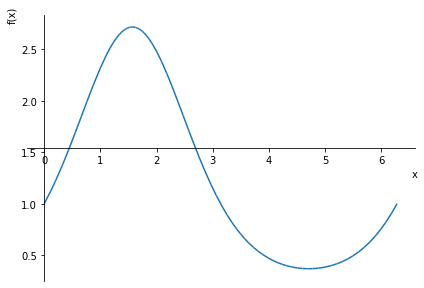

In [22]:
plot((f, (x, 0, 2 * Pi)))

### Задание 2.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7  на одном периоде, построить график.
$$
f(x) = \frac{1}{\sin(x) + \cos(x)}.
$$
###### 1. Область определения

In [23]:
f = 1 / (Sin(x) + Cos(x))
domain = continuous_domain(f, x, S.Reals)
domain

Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers)))

Сингулярные точки (точки, где функция не определена)

In [24]:
singular = singularities(f, x)
singular

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))

###### 2. Область значений

In [25]:
range = function_range(f, x, S.Reals)
range

Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 3. Периодичность

In [26]:
period = periodicity(f, x)
period_range = Interval(0, period)
period

2*pi

###### 4. Стационарные точки

In [27]:
station = stationary_points(f, x)
station

Union(Complement(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))))

###### 5. Максимальное и минимальное значения функции

In [28]:
display(maximum(f, x), minimum(f, x))

oo

-oo

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [29]:
continuous_domain(f, x, period_range)

Union(Interval.Ropen(0, 3*pi/4), Interval.open(3*pi/4, 7*pi/4), Interval.Lopen(7*pi/4, 2*pi))

Сингулярные точки (точки, где функция не определена)

In [30]:
singularities(f, x, period_range)

FiniteSet(3*pi/4, 7*pi/4)

###### 2. Область значений

In [31]:
function_range(f, x, period_range)

Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 4. Стационарные точки

In [32]:
stationary_points(f, x, period_range)

FiniteSet(pi/4, 5*pi/4)

###### 5. Максимальное и минимальное значения функции

In [33]:
display(maximum(f, x, period_range), minimum(f, x, period_range))

oo

-oo

###### 6. Монотонность

In [35]:
intervals = [
  Interval.open(- Pi / 4, Pi / 4),
  Interval.open(Pi / 4, 3 * Pi / 4),
  Interval.open(3 * Pi / 4, 5 * Pi / 4),
  Interval.open(5 * Pi / 4, 7 * Pi / 4)
]

for interval in intervals:
  display(interval)
  print(is_monotonic(f, interval=interval), is_decreasing(f, interval=interval), is_increasing(f, interval=interval), is_strictly_decreasing(f, interval=interval), is_strictly_increasing(f, interval=interval))

Interval.open(-pi/4, pi/4)

True False False False False


Interval.open(pi/4, 3*pi/4)

True False True False True


Interval.open(3*pi/4, 5*pi/4)

True False True False True


Interval.open(5*pi/4, 7*pi/4)

True True False True False


###### 7. Минимальное и максимальное значение функции на периоде

In [36]:
display(maximum(f, x, period_range), minimum(f, x, period_range))

oo

-oo

###### График

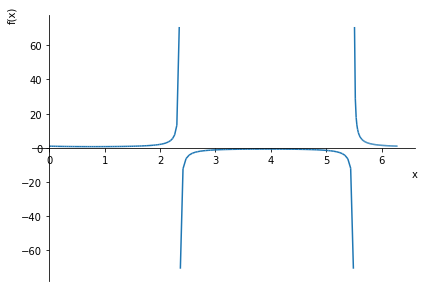

In [37]:
plot(
    (f, (x, 0, 3 * Pi / 4 - 0.01)),
    (f, (x, 3* Pi / 4 + 0.01, 7 * Pi / 4 - 0.01)),
    (f, (x, 7 * Pi / 4 + 0.01, 2 * Pi))
)

### Индивидуальное задание.  
Исследовать функцию $f(x)$, найти минимальное и максимальное значение на каком-нибудь конечном интервале, не содержащем точек разрыва, построить график.

###Вариант 4
$f(x) = 3 \sqrt{1 - 3 \sin{\left(x \right)}}$

  

###### 1. Область определения

In [40]:
f = 3 * sympy.sqrt(1 - 3 * Sin(x))

display(continuous_domain(f, x, S.Reals))

Union(Interval(0, atan(sqrt(2)/4)), Interval.Ropen(pi - atan(sqrt(2)/4), 2*pi))

Сингулярные точки (точки, где функция не определена)

In [42]:
singularities(f, x)

EmptySet

###### 2. Область значений

In [43]:
function_range(f, x, domain = S.Reals)

Interval(0, 6)

###### 3. Периодичность

In [44]:
periodicity(f, x, check=False)

2*pi

###### 4. Стационарные точки

In [47]:
stationary_points(f, x, domain=S.Reals)

FiniteSet(3*pi/2)

###### 5. Максимальное и минимальное значения функции

In [46]:
display(maximum(f, x, domain=S.Reals))
display(minimum(f, x, domain=S.Reals))

6

0

###### 6. Монотонность  

In [48]:
intervals = [
  Interval.open(0, Pi / 2),
  Interval.open(Pi / 2, Pi),
  Interval.open(Pi, 3 * Pi / 2),
  Interval.open(3 * Pi / 2, 2 * Pi)
]

for interval in intervals:
  display(interval)
  print(
      is_monotonic(f, interval=interval),
      is_decreasing(f, interval=interval),
      is_increasing(f, interval=interval),
      is_strictly_decreasing(f, interval=interval),
      is_strictly_increasing(f, interval=interval)
  )

Interval.open(0, pi/2)

RecursionError: ignored

###### 7. Минимальное и максимальное значение функции на интервале 

In [49]:
for interval in intervals:
  display(interval)
  if is_monotonic(f, interval=interval):
    display(maximum(f, x, domain=interval))
    display(minimum(f, x, domain=interval))

Interval.open(0, pi/2)

3

0

Interval.open(pi/2, pi)

3

0

Interval.open(pi, 3*pi/2)

6

3

Interval.open(3*pi/2, 2*pi)

6

3

###### График

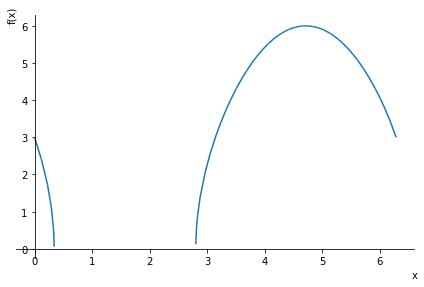

In [51]:
plot((f, (x, 0, 2 * Pi)))